<a href="https://colab.research.google.com/github/romiaprilian7406/submission-bike-sharing/blob/romiaprilian7406-patch-4/notebooks/ML_Romi_Aprilian_Mustafa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Romi Aprilian Mustafa

## Menentukan Pertanyaan Bisnis

### A. Analisis Deskriptif (Exploratory Data Analysis)
*Fokus: Memahami pola masa lalu dan hubungan antar variabel.*

1.  **Pola Waktu (Time Series):** Bagaimana karakteristik perbedaan pola penyewaan antara Hari Kerja (*Working Day*) dan Hari Libur (*Holiday*)?
2.  **Pertumbuhan Bisnis (Growth):** Bagaimana tren performa penyewaan sepeda pada tahun 2011 dibandingkan tahun 2012?
3.  **Faktor Musim (Seasonality):** Musim apa yang menjadi "Masa Panen" (*Peak Season*) dengan rata-rata penyewaan tertinggi?
4.  **Sensitivitas Cuaca (Environment):** Seberapa signifikan dampak kondisi cuaca buruk (hujan/salju) terhadap penurunan jumlah penyewaan?
5.  **Segmentasi Pelanggan (User Behavior):** Bagaimana perbedaan perilaku penggunaan sepeda antara Pengguna Terdaftar (*Registered*) dan Pengguna Kasual (*Casual*)?

### B. Analisis Lanjutan (Advanced Modeling)
*Fokus: Menggunakan Machine Learning untuk segmentasi otomatis.*

6.  **Segmentasi Jam Sibuk (Clustering):** Bagaimana kita dapat mengelompokkan jam operasional ke dalam kategori secara otomatis menggunakan algoritma K-Means untuk membantu manajemen stok?

## Landasan Teori

### 1. Peran Analisis Data dalam Pengambilan Keputusan
**Analisis Data** adalah proses inspeksi, pembersihan, transformasi, dan pemodelan data dengan tujuan menemukan informasi yang berguna. Dalam konteks bisnis, analisis data mengubah intuisi menjadi **Keputusan Berbasis Data (*Data-Driven Decision Making*)**. Hal ini meminimalisir risiko spekulasi dan memastikan setiap strategi (seperti manajemen stok sepeda) didukung oleh bukti empiris yang kuat.

### 2. Perbedaan Descriptive Analysis vs Exploratory Data Analysis (EDA)
Meskipun sering berjalan beriringan, keduanya memiliki fokus berbeda:
* **Descriptive Analysis:** Menjawab pertanyaan *"Apa yang terjadi di masa lalu?"*. Fokusnya adalah ringkasan statistik (Mean, Median, Modus, Standar Deviasi) untuk menggambarkan kondisi data secara umum.
* **Exploratory Data Analysis (EDA):** Menjawab pertanyaan *"Mengapa ini terjadi?"* dan *"Apa pola tersembunyinya?"*. EDA bersifat investigatif, mencari hubungan antar variabel (korelasi), mendeteksi anomali (outlier), dan menguji hipotesis awal sebelum pemodelan.

### 3. Urgensi Data Cleaning & Wrangling
Prinsip utama dalam data science adalah ***"Garbage In, Garbage Out"***.
* **Data Cleaning:** Menghapus noise, menangani *missing values*, dan memperbaiki tipe data yang salah.
* **Data Wrangling:** Mengubah format data mentah menjadi format yang siap dianalisis (contoh: ekstraksi jam dari tanggal).
Tanpa proses ini, hasil analisis akan bias, tidak akurat, dan berpotensi menghasilkan kesimpulan yang menyesatkan.

### 4. Peran Visualisasi Data
Visualisasi bukan sekadar estetika, melainkan alat komunikasi utama. Otak manusia memproses gambar 60.000 kali lebih cepat daripada teks. Visualisasi yang efektif (seperti Heatmap, Scatter Plot, Bar Chart) berfungsi untuk menyederhanakan kompleksitas data angka menjadi *insight* yang dapat dipahami oleh *stakeholder* dalam hitungan detik.

### 5. Teknik Machine Learning: Clustering (K-Means)
Dalam proyek ini, digunakan teknik **Unsupervised Learning** dengan algoritma **K-Means Clustering**.
* **Mengapa K-Means?**
    Tujuan bisnis kita adalah melakukan segmentasi jam operasional (misal: Jam Sibuk vs Jam Sepi). Karena data historis kita tidak memiliki label kategori tersebut secara eksplisit, kita menggunakan K-Means untuk mengelompokkan data secara otomatis berdasarkan kemiripan fitur **Jumlah Sewa (`cnt`)** dan **Waktu (`hr`)**. Algoritma ini akan mencari pola natural ("centroid") dan membagi jam operasional menjadi segmen strategi yang objektif.

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

sns.set_theme(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

day_df = pd.read_csv(f"{path}/day.csv")
hour_df = pd.read_csv(f"{path}/hour.csv")

Using Colab cache for faster access to the 'bike-sharing-dataset' dataset.


### Assessing Data

In [3]:
# shape
print(f"Shape day.csv: {day_df.shape}")
print(f"Shape hour.csv: {hour_df.shape}")

# info
print("Info Day DF ")
day_df.info()
print("\nInfo Hour DF ")
hour_df.info()

# 2. Missing Values
print("\nMissing Values ")
print(f"Jumlah Missing Value di Day DF : {day_df.isna().sum().sum()}")
print(f"Jumlah Missing Value di Hour DF: {hour_df.isna().sum().sum()}")

# 3. Duplikasi
print("\nDuplikasi Data ")
print(f"Jumlah Duplikat di Day DF : {day_df.duplicated().sum()}")
print(f"Jumlah Duplikat di Hour DF: {hour_df.duplicated().sum()}")

# 4. Preview Data
print("\nPreview Day DF")
display(day_df.head())
print("\nPreview Hour DF")
display(hour_df.head())

Shape day.csv: (731, 16)
Shape hour.csv: (17379, 17)
Info Day DF 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Info Hour DF 
<class 'pand

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Preview Hour DF


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

#### 1. Struktur & Volume Data
- **Dataset Harian (`day.csv`):**
  - Memiliki **731 baris**, yang merepresentasikan data selama **2 tahun penuh** (2011 dan 2012).
  - Terdiri dari 16 kolom.
- **Dataset Per Jam (`hour.csv`):**
  - Memiliki **17.379 baris**, memberikan detail granularitas yang lebih tinggi (per jam) untuk analisis pola waktu yang spesifik.
  - Terdiri dari 17 kolom (ada tambahan kolom `hr` untuk jam).

#### 2. Kualitas Data (*Data Quality*)
- **Sangat Bersih (*Clean*):**
  - **Missing Values:** `0`. Tidak ada data yang hilang di kedua dataset.
  - **Duplikasi:** `0`. Tidak ada data ganda (*redundant*) di kedua dataset.
- **Implikasi:** Kita tidak perlu melakukan teknik imputasi (pengisian nilai kosong) atau penghapusan baris duplikat. Data siap untuk diproses ke tahap selanjutnya.

#### 3. Masalah Tipe Data (Perlu Perbaikan)
Meskipun bersih dari nilai kosong, terdapat ketidaksesuaian tipe data yang harus diperbaiki pada tahap *Cleaning Data*:

- **Kolom `dteday`:** Saat ini bertipe `object` (string).
  - *Masalah:* Pandas tidak bisa membacanya sebagai urutan waktu kronologis.
  - *Solusi:* Harus diubah menjadi tipe `datetime` agar bisa dilakukan ekstraksi (tahun, bulan, hari) dan *resampling*.
- **Kolom Kategorikal (`season`, `yr`, `mnth`, `weathersit`, dll):** Masih bertipe `int64` (angka).
  - *Masalah:* Angka 1, 2, 3 sulit dipahami maknanya saat visualisasi.
  - *Solusi:* Perlu diubah menjadi label deskriptif (misal: 1 = 'Spring', 0 = '2011') agar grafik mudah dibaca.

#### 4. Observasi Nilai Data (*Variable Values*)
- **Normalisasi Fitur:** Terlihat pada preview data bahwa kolom `temp`, `atemp`, `hum`, dan `windspeed` memiliki nilai desimal antara 0 hingga 1 (contoh: `0.344`). Ini menandakan data tersebut sudah dinormalisasi (dibagi dengan nilai maksimumnya).
- **Variabel Target:** Kolom `cnt` (*count*) adalah variabel target yang merupakan penjumlahan dari `casual` + `registered`.

### Cleaning Data

In [4]:
# 1. Memperbaiki Tipe Data Tanggal
# Kolom 'dteday' awalnya object, diubah ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# 2. Membuat Kolom Label (Mapping)
# A. Mapping Musim (1:Spring, 2:Summer, 3:Fall, 4:Winter), penamaan ini dibuat berdasarkan Dataset Information di kaggle
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_map)
hour_df['season_label'] = hour_df['season'].map(season_map)

# B. Mapping Tahun (0:2011, 1:2012)
year_map = {0: 2011, 1: 2012}
day_df['year_label'] = day_df['yr'].map(year_map)
hour_df['year_label'] = hour_df['yr'].map(year_map)

# C. Mapping Hari Kerja (Untuk Pertanyaan Bisnis 1)
working_map = {0: 'Holiday/Weekend', 1: 'Working Day'}
hour_df['workingday_label'] = hour_df['workingday'].map(working_map)

# D. Mapping Cuaca (Untuk info tambahan)
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow',
    4: 'Heavy Rain'
}
day_df['weather_label'] = day_df['weathersit'].map(weather_map)
hour_df['weather_label'] = hour_df['weathersit'].map(weather_map)

# Konfirmasi Cleaning
day_df.info()
display(day_df[['dteday', 'season_label', 'year_label', 'weather_label']].head())
hour_df.info()
display(hour_df[['dteday', 'season_label', 'year_label', 'weather_label']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   dteday         731 non-null    datetime64[ns]
 2   season         731 non-null    int64         
 3   yr             731 non-null    int64         
 4   mnth           731 non-null    int64         
 5   holiday        731 non-null    int64         
 6   weekday        731 non-null    int64         
 7   workingday     731 non-null    int64         
 8   weathersit     731 non-null    int64         
 9   temp           731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  hum            731 non-null    float64       
 12  windspeed      731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  cnt            731 non-

,dteday,season_label,year_label,weather_label
0,2011-01-01,Spring,2011,Mist
1,2011-01-02,Spring,2011,Mist
2,2011-01-03,Spring,2011,Clear
3,2011-01-04,Spring,2011,Clear
4,2011-01-05,Spring,2011,Clear


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   dteday            17379 non-null  datetime64[ns]
 2   season            17379 non-null  int64         
 3   yr                17379 non-null  int64         
 4   mnth              17379 non-null  int64         
 5   hr                17379 non-null  int64         
 6   holiday           17379 non-null  int64         
 7   weekday           17379 non-null  int64         
 8   workingday        17379 non-null  int64         
 9   weathersit        17379 non-null  int64         
 10  temp              17379 non-null  float64       
 11  atemp             17379 non-null  float64       
 12  hum               17379 non-null  float64       
 13  windspeed         17379 non-null  float64       
 14  casual            1737

,dteday,season_label,year_label,weather_label
0,2011-01-01,Spring,2011,Clear
1,2011-01-01,Spring,2011,Clear
2,2011-01-01,Spring,2011,Clear
3,2011-01-01,Spring,2011,Clear
4,2011-01-01,Spring,2011,Clear


**Insight:**

#### 1. Sukses Konversi Tipe Data (*Type Casting*)
- **Kolom `dteday`:**
  - *Status:* Berhasil diubah dari `object` (string) menjadi **`datetime64[ns]`**.
  - *Dampak:* Data kini memiliki struktur waktu yang valid. Hal ini memungkinkan kita untuk melakukan analisis berbasis waktu (*Time Series Analysis*) seperti *resampling* bulanan, ekstraksi hari, dan plotting grafik garis (*line chart*) yang terurut secara kronologis.

#### 2. Penambahan Fitur Baru (*Feature Engineering*)
Telah berhasil ditambahkan kolom-kolom baru yang bersifat *Human-Readable* (mudah dibaca manusia) untuk menggantikan kode angka yang membingungkan:
- **`season_label`:** Mengubah angka (1,2,3,4) menjadi teks ('Spring', 'Summer', 'Fall', 'Winter').
- **`weather_label`:** Mengubah kode cuaca menjadi deskripsi ('Clear', 'Mist', 'Light Snow', 'Heavy Rain').
- **`year_label`:** Memetakan tahun 0/1 menjadi 2011/2012.
- **`workingday_label`** (khusus di `hour_df`): Membedakan 'Working Day' dan 'Holiday/Weekend'.

*Dampak:* Saat visualisasi nanti, grafik akan otomatis menampilkan label teks yang informatif, bukan lagi angka kode, sehingga *insight* lebih mudah dikomunikasikan kepada pemangku kepentingan (*stakeholders*).

#### 3. Integritas Data Terjaga
- **Jumlah Baris Tetap:**
  - `day_df` tetap 731 baris.
  - `hour_df` tetap 17.379 baris.
- **Tidak Ada Data Hilang:** Kolom baru terisi penuh (*non-null*) untuk semua baris.
- **Kesimpulan:** Proses cleaning berjalan aman tanpa menyebabkan kebocoran atau kerusakan data. Dataset kini dalam kondisi **"Analysis-Ready"** untuk masuk ke tahap Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

In [5]:
# Analisis Q1: Pola Jam Kerja vs Libur
print("Jam Tersibuk (TOP 5)")
peak_hours = hour_df.groupby(['workingday_label', 'hr'])['cnt'].mean().reset_index()
print("Hari Kerja (Working Day):")
display(peak_hours[peak_hours['workingday_label']=='Working Day'].sort_values('cnt', ascending=False).head(5))
print("Hari Libur (Holiday/Weekend):")
display(peak_hours[peak_hours['workingday_label']=='Holiday/Weekend'].sort_values('cnt', ascending=False).head(5))

# Analisis Q2: Pertumbuhan Tahunan
print("\nPertumbuhan Tahunan (Total Sewa)")
yearly_stats = day_df.groupby('year_label')['cnt'].sum().reset_index()
yearly_stats['Growth (%)'] = yearly_stats['cnt'].pct_change() * 100
display(yearly_stats)

# Analisis Q3: Performa Musim
print("\nRata-Rata Sewa Per Musim")
seasonal_stats = day_df.groupby('season_label')['cnt'].mean().sort_values(ascending=False).reset_index()
display(seasonal_stats)

# Analisis Q4: Dampak Cuaca
print("\nRata-Rata Sewa Per Kondisi Cuaca")
weather_stats = day_df.groupby('weather_label')['cnt'].mean().sort_values(ascending=False).reset_index()
display(weather_stats)

# Analisis Q5: Casual vs Registered
print("\nPerbandingan Tipe User (Total)")
user_type_stats = day_df[['casual', 'registered']].sum().reset_index()
user_type_stats.columns = ['User Type', 'Total Rentals']
display(user_type_stats)

Jam Tersibuk (TOP 5)
Hari Kerja (Working Day):


,workingday_label,hr,cnt
41,Working Day,17,525.290581
42,Working Day,18,492.226908
32,Working Day,8,477.006048
43,Working Day,19,348.401606
40,Working Day,16,293.122244


Hari Libur (Holiday/Weekend):


,workingday_label,hr,cnt
13,Holiday/Weekend,13,372.731602
12,Holiday/Weekend,12,366.259740
14,Holiday/Weekend,14,364.645022
15,Holiday/Weekend,15,358.813853
16,Holiday/Weekend,16,352.727273



Pertumbuhan Tahunan (Total Sewa)


,year_label,cnt,Growth (%)
0,2011,1243103,NaN
1,2012,2049576,64.875799



Rata-Rata Sewa Per Musim


,season_label,cnt
0,Fall,5644.303191
1,Summer,4992.331522
2,Winter,4728.162921
3,Spring,2604.132597



Rata-Rata Sewa Per Kondisi Cuaca


,weather_label,cnt
0,Clear,4876.786177
1,Mist,4035.862348
2,Light Snow,1803.285714



Perbandingan Tipe User (Total)


,User Type,Total Rentals
0,casual,620017
1,registered,2672662


**Insight:**

#### **1. Pola Waktu: "Commuters" vs "Leisure"**
- **Hari Kerja (*Working Day*):** Pola penyewaan sangat dipengaruhi oleh jam kerja kantor/sekolah.
    - **Puncak Aktivitas:** Terjadi pada pukul **17:00** (525 unit) dan **18:00** (492 unit) saat jam pulang kerja, serta pukul **08:00** (477 unit) saat jam berangkat kerja.
    - **Kesimpulan:** Pada hari kerja, sepeda digunakan sebagai moda transportasi utama (*commuting*).
- **Hari Libur (*Holiday/Weekend*):** Pola penyewaan menyebar di siang hari.
    - **Puncak Aktivitas:** Terjadi pada pukul **13:00** (372 unit) hingga **16:00**, tanpa lonjakan tajam seperti hari kerja.
    - **Kesimpulan:** Pada hari libur, sepeda digunakan untuk rekreasi atau olahraga santai.

#### **2. Pertumbuhan Bisnis: Ekspansi Signifikan**
- Bisnis mengalami pertumbuhan yang sangat sehat dari tahun ke tahun.
- **Data:** Total penyewaan meningkat dari **1,24 juta** (2011) menjadi **2,04 juta** (2012).
- **Growth Rate:** Tercatat pertumbuhan sebesar **64.88%**. Ini menandakan strategi bisnis berjalan efektif dan permintaan pasar meningkat pesat.

#### **3. Musim: Musim Gugur adalah Raja**
- **Peak Season:** **Musim Gugur (*Fall*)** mencatat rata-rata tertinggi (**5.644** sewa/hari), diikuti oleh Musim Panas (*Summer*).
- **Low Season:** **Musim Semi (*Spring*)** justru menjadi periode paling sepi (**2.604** sewa/hari), bahkan lebih rendah dari Musim Dingin. Hal ini mungkin disebabkan oleh cuaca transisi yang tidak menentu atau curah hujan tinggi di awal tahun.
- **Rekomendasi:** Lakukan *maintenance* besar-besaran armada sepeda pada Musim Semi agar unit siap 100% saat memasuki *Peak Season*.

#### **4. Cuaca: Sensitivitas Tinggi terhadap Hujan**
- Kondisi cuaca memiliki dampak drastis terhadap permintaan.
- **Cuaca Cerah (*Clear*):** Rata-rata **4.876** sewa/hari.
- **Hujan Ringan/Salju (*Light Snow*):** Permintaan anjlok drastis menjadi **1.803** sewa/hari.
- **Insight:** Penurunan kualitas cuaca dari "Mendung" ke "Hujan" menyebabkan kehilangan potensi sewa lebih dari **50%**.

#### **5. Segmentasi User: Dominasi Pelanggan Tetap**
- **Registered User:** Mencapai total **2,67 juta** penyewaan.
- **Casual User:** Hanya **620 ribu** penyewaan.
- **Insight:** Sekitar **81%** transaksi berasal dari pengguna terdaftar (*Registered*). Ini menunjukkan bahwa bisnis ini lebih bersifat *retention-based* (pelanggan setia/sehari-hari) daripada *tourist-based*.

## Visualization

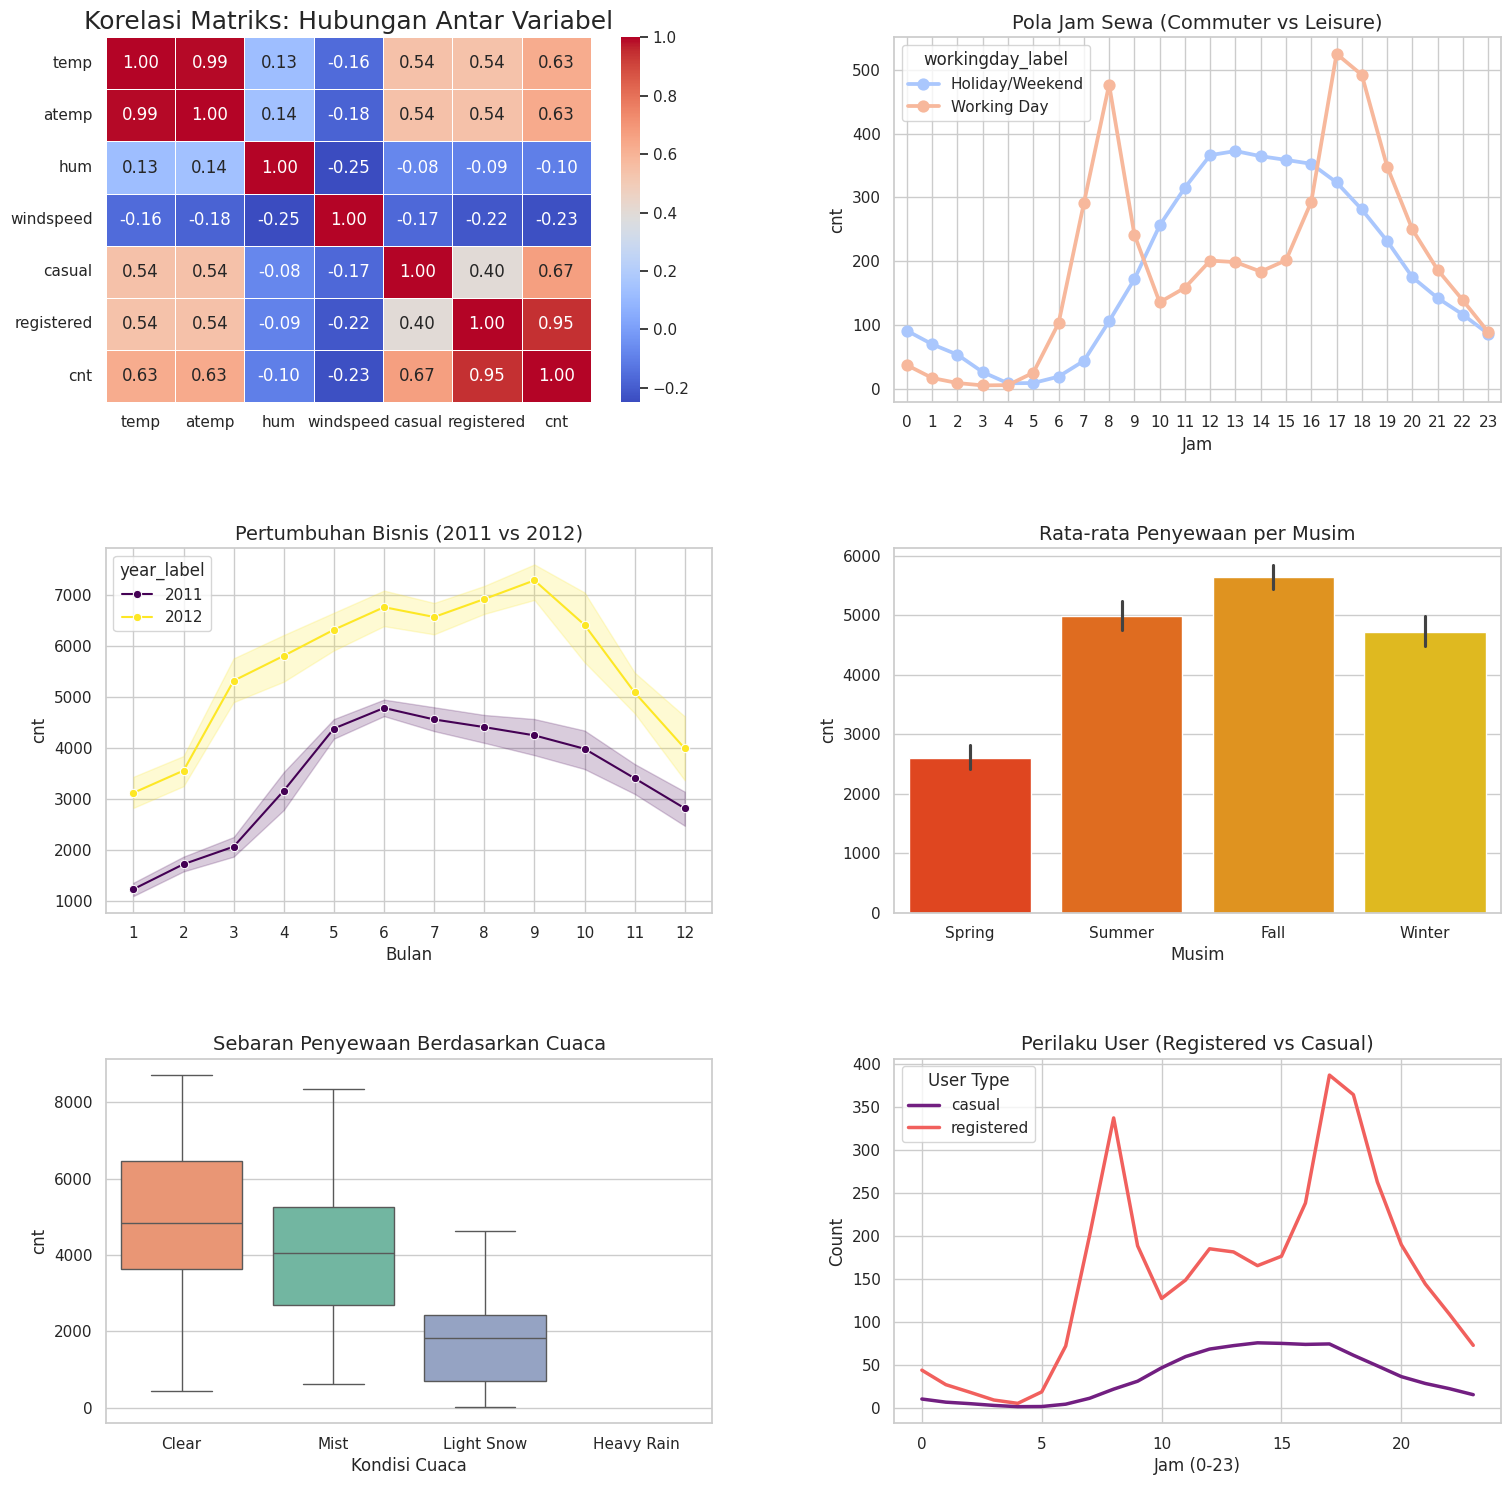

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr_matrix = day_df[numeric_cols].corr()

# PLOT 0: KORELASI HEATMAP
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax[0, 0])
ax[0, 0].set_title('Korelasi Matriks: Hubungan Antar Variabel', fontsize=18)

# GRAFIK 1: Pola Jam Kerja vs Libur
sns.pointplot(data=hour_df, x='hr', y='cnt', hue='workingday_label',
              palette='coolwarm', errorbar=None, ax=ax[0, 1])
ax[0, 1].set_title('Pola Jam Sewa (Commuter vs Leisure)', fontsize=14)
ax[0, 1].set_xlabel('Jam')
ax[0, 1].grid(True)

# GRAFIK 2: Tren Tahunan
sns.lineplot(data=day_df, x='mnth', y='cnt', hue='year_label',
             palette='viridis', marker='o', ax=ax[1, 0])
ax[1, 0].set_title('Pertumbuhan Bisnis (2011 vs 2012)', fontsize=14)
ax[1, 0].set_xlabel('Bulan')
ax[1, 0].set_xticks(range(1, 13))
ax[1, 0].grid(True)

# GRAFIK 3: Musim (Seasonality)
sns.barplot(data=day_df, x='season_label', y='cnt',
            palette='autumn', order=['Spring', 'Summer', 'Fall', 'Winter'], ax=ax[1, 1])
ax[1, 1].set_title('Rata-rata Penyewaan per Musim', fontsize=14)
ax[1, 1].set_xlabel('Musim')

# GRAFIK 4: Dampak Cuaca (Boxplot)
sns.boxplot(data=day_df, x='weather_label', y='cnt', hue='weather_label', palette='Set2',
            order=['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], legend=False, ax=ax[2, 0])
ax[2, 0].set_title('Sebaran Penyewaan Berdasarkan Cuaca', fontsize=14)
ax[2, 0].set_xlabel('Kondisi Cuaca')

# GRAFIK 5: User Registered vs Casual (Hourly Pattern)
user_hour = hour_df.groupby('hr')[['casual', 'registered']].mean().reset_index()
user_hour_melt = user_hour.melt(id_vars='hr', var_name='User Type', value_name='Count')

sns.lineplot(data=user_hour_melt, x='hr', y='Count', hue='User Type',
             palette='magma', linewidth=2.5, ax=ax[2, 1])
ax[2, 1].set_title('Perilaku User (Registered vs Casual)', fontsize=14)
ax[2, 1].set_xlabel('Jam (0-23)')
ax[2, 1].grid(True)

plt.show()

**Insight:**

#### **1. Korelasi Matriks (Heatmap - Kiri Atas)**
- **Dominasi Suhu:** Variabel `temp` (suhu) dan `atemp` (suhu rasa) memiliki korelasi positif paling kuat terhadap `cnt` (Total Sewa), dengan nilai sekitar **0.63**. Ini memvalidasi bahwa orang cenderung menyewa sepeda saat suhu hangat.
- **Multikolinearitas:** Korelasi antara `temp` dan `atemp` sangat tinggi (**0.99**). Ini memberi sinyal teknis bahwa untuk pemodelan *Machine Learning* nanti, kita cukup menggunakan salah satu saja agar model tidak bias.
- **Pengaruh Kelembaban:** `hum` (Humidity) memiliki korelasi negatif, artinya semakin lembab udara, keinginan orang bersepeda cenderung menurun.

#### **2. Pola Jam Sewa: Commuter vs Leisure (Kanan Atas)**
- **Validasi Perilaku:** Grafik ini memvisualisasikan perbedaan drastis pola hidup.
- **Garis Merah (Hari Kerja):** Membentuk pola "Dua Puncak" (Bimodal) yang tajam di jam 08:00 dan 17:00, membuktikan bahwa sepeda adalah alat transportasi utama pekerja.
- **Garis Biru (Hari Libur):** Membentuk kurva landai di siang hari, membuktikan sepeda digunakan untuk santai/wisata.

#### **3. Tren Pertumbuhan Bisnis (Kiri Tengah)**
- **Konsistensi Pertumbuhan:** Garis kuning (2012) secara konsisten berada jauh di atas garis ungu (2011) di hampir setiap bulan.
- **Pola Musiman:** Kedua garis menunjukkan pola "naik-turun" yang seragam (naik di tengah tahun, turun di akhir tahun), menandakan bahwa fluktuasi bisnis ini sangat terpola (*predictable*) namun volume permintaannya meningkat.

#### **4. Performa Musim (Kanan Tengah)**
- **Kejutan Data:** Secara visual, **Musim Gugur (Fall)**—batang oranye—justru lebih tinggi daripada Musim Panas (Summer). Hal ini mungkin karena cuaca musim gugur lebih sejuk dan nyaman untuk aktivitas fisik dibandingkan panas terik di puncak musim panas.
- **Titik Terendah:** Musim Semi (Spring) adalah periode terlemah, terlihat jelas dari batang yang paling pendek.

#### **5. Dampak Cuaca (Kiri Bawah)**
- **Sensitivitas Tinggi:** *Boxplot* menunjukkan penurunan median yang signifikan seiring memburuknya cuaca.
- **Risiko Bisnis:** Pada kondisi "Light Snow/Rain", tidak hanya rata-rata sewa yang turun, tetapi variasi datanya juga menyempit di angka rendah. Area kosong pada kategori "Heavy Rain" (jika ada di sumbu X) menegaskan bahwa operasional lumpuh total saat cuaca ekstrem.

#### **6. Perilaku User: Registered vs Casual (Kanan Bawah)**
- **Penentu Jam Sibuk:** Grafik ini mengungkap bahwa lonjakan tajam pada jam sibuk (08:00 & 17:00) **100% didorong oleh Registered User** (Garis Ungu Gelap/Hitam).
- **Wisatawan Siang Hari:** *Casual User* (Garis Terang) memiliki pola yang hampir datar namun naik perlahan di siang hari, mirip dengan pola hari libur.
- **Strategi:** Kampanye marketing untuk pekerja harus difokuskan pada *membership* (Registered), sementara untuk turis difokuskan pada sewa harian (Casual).

## Analisis Lanjutan Menggunakan Clustering

### Exploratory Data Analysis

Statistik Deskriptif


,hr,cnt
count,17379.00,17379.00
mean,11.55,189.46
std,6.91,181.39
min,0.00,1.00
25%,6.00,40.00
50%,12.00,142.00
75%,18.00,281.00
max,23.00,977.00



Distribusi Data dan Analisis Outlier
99% data memiliki jumlah sewa di bawah: 782.22 unit
Nilai Maksimum (Max): 977 unit


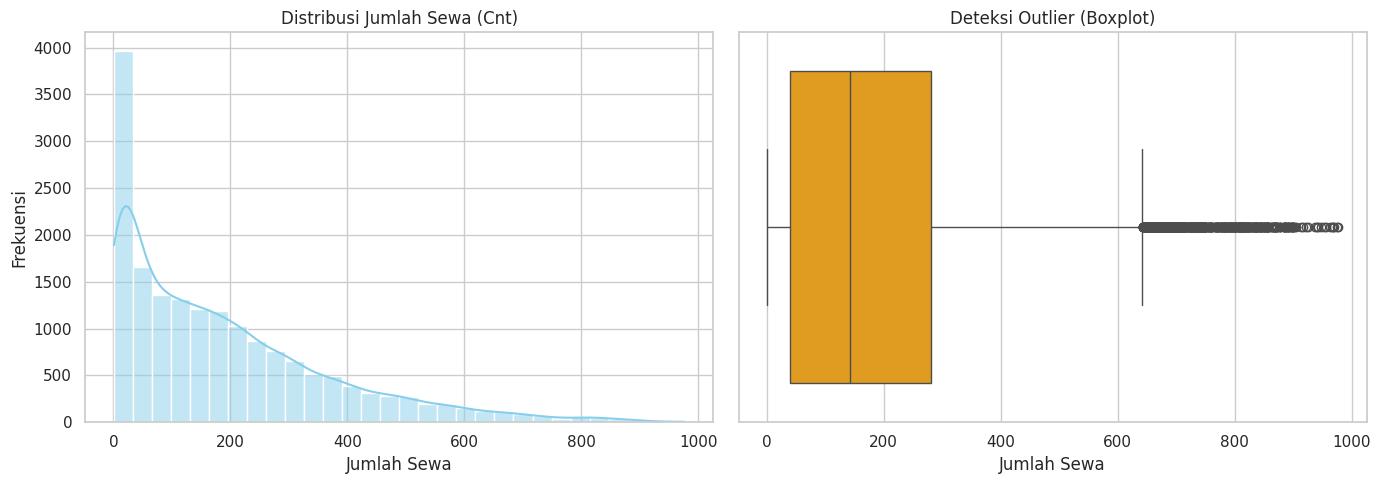

In [7]:
print("Statistik Deskriptif")
display(hour_df[['hr', 'cnt']].describe().round(2))

print("\nDistribusi Data dan Analisis Outlier")
# Menghitung batas persentil 99%
q99 = hour_df['cnt'].quantile(0.99)
max_val = hour_df['cnt'].max()

print(f"99% data memiliki jumlah sewa di bawah: {q99:.2f} unit")
print(f"Nilai Maksimum (Max): {max_val} unit")

# Visualisasi Distribusi
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Histogram
sns.histplot(hour_df['cnt'], bins=30, kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Distribusi Jumlah Sewa (Cnt)')
ax[0].set_xlabel('Jumlah Sewa')
ax[0].set_ylabel('Frekuensi')

# Plot 2: Boxplot
sns.boxplot(x=hour_df['cnt'], color='orange', ax=ax[1])
ax[1].set_title('Deteksi Outlier (Boxplot)')
ax[1].set_xlabel('Jumlah Sewa')

plt.tight_layout()
plt.show()

**Insight:**

#### 1. Volatilitas Permintaan Tinggi (High Variance)
- **Fakta:** Nilai Standar Deviasi (`std`: 181) hampir setara dengan nilai Rata-rata (`mean`: 189).
- **Insight Bisnis:** Ini menunjukkan bahwa permintaan sepeda **sangat fluktuatif**. Tidak ada "standar" permintaan yang tetap; kondisinya bisa sangat sepi (min: 1) atau sangat ramai (max: 977).
- **Implikasi Modeling:** Metode manual (seperti mengambil rata-rata saja) akan gagal menangkap dinamika ini. Pendekatan *Clustering* sangat tepat untuk memisahkan kondisi yang "timpang" ini menjadi kelompok yang jelas.

#### 2. Distribusi Data "Right-Skewed" (Miring ke Kanan)
- **Fakta:** Nilai Median (142) jauh lebih kecil daripada Mean (189), dan Q3 (281) masih jauh di bawah Max (977).
- **Insight:** Mayoritas waktu operasional berada di level permintaan rendah hingga menengah (Low-Medium). Momen "Sangat Ramai" adalah kejadian yang lebih jarang, namun volumenya sangat masif.

#### 3. Validitas Outlier (The "Rush Hour" Effect)
- **Fakta:** Nilai Maksimum (977) memang lebih tinggi dari batas 99% data (782), namun masih dalam rentang yang masuk akal (bukan angka ribuan yang mustahil).
- **Keputusan:** Nilai-nilai ekstrem ini **TIDAK AKAN DIHAPUS**. Dalam konteks *Bike Sharing*, angka 900+ ini merepresentasikan *Rush Hour* (Jam Sibuk) atau *Event* tertentu yang justru menjadi target utama bisnis untuk dimaksimalkan. Jika dihapus, kita akan kehilangan pola "High Demand".

#### 4. Kebutuhan Scaling Mutlak
- **Fakta:** Rentang fitur `hr` (Jam) hanya 0-23, sedangkan `cnt` (Jumlah) mencapai 0-977.
- **Kesimpulan Teknis:** Perbedaan skala yang sangat jauh ini (gap 1:40) mengonfirmasi bahwa penggunaan **`StandardScaler` adalah WAJIB**. Tanpa scaling, algoritma K-Means akan bias dan hanya mengelompokkan berdasarkan jumlah sewa, mengabaikan faktor waktu.

### Preprocessing

In [8]:
# Fitur yang digunakan: 'hr' (Waktu) dan 'cnt' (Permintaan)
X_cluster = hour_df[['hr', 'cnt']].copy()

# Standard Scaling
# Mengubah skala agar 'hr' dan 'cnt' memiliki bobot yang setara
# Tanpa ini, K-Means akan bias karena nilai 'cnt' (0-977) jauh lebih besar dari 'hr' (0-23)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print(f"Shape Data: {X_scaled.shape}")

print("\nContoh 5 Data Pertama (Sebelum Scaling)")
display(X_cluster.head())

print("\nContoh 5 Data Pertama (Sesudah Scaling)")
df_preview = pd.DataFrame(X_scaled, columns=['hr_scaled', 'cnt_scaled'])
display(df_preview.head())

Shape Data: (17379, 2)

Contoh 5 Data Pertama (Sebelum Scaling)


,hr,cnt
0,0,16
1,1,40
2,2,32
3,3,13
4,4,1



Contoh 5 Data Pertama (Sesudah Scaling)


,hr_scaled,cnt_scaled
0,-1.670004,-0.956339
1,-1.525374,-0.824022
2,-1.380744,-0.868128
3,-1.236115,-0.972879
4,-1.091485,-1.039037


**Insight:**

#### 1. Integritas Data Terjaga (*Data Integrity*)
- **Fakta:** Shape data akhir adalah `(17379, 2)`.
- **Insight:** Jumlah baris tetap sama dengan data asli (*hour.csv*), artinya tidak ada data yang hilang atau terhapus selama proses seleksi kolom. Kita menggunakan 2 fitur inti: Jam (`hr`) dan Jumlah Sewa (`cnt`).

#### 2. Transformasi Skala (*Standardization*)
- **Sebelum Scaling:**
  - Fitur `hr` berupa angka urut (0, 1, 2...).
  - Fitur `cnt` berupa angka puluhan/ratusan (16, 40, 32...).
  - **Masalah:** Jika langsung dipakai, algoritma akan menganggap selisih "24 sepeda" (40-16) jauh lebih penting daripada selisih "1 jam" (1-0), padahal keduanya sama pentingnya.
  
- **Sesudah Scaling:**
  - Nilai berubah menjadi rentang desimal kecil (contoh: -1.67, -0.95).
  - **Solusi:** Ini adalah *Z-score*. Angka -1.67 artinya data tersebut berada 1.67 standar deviasi di bawah rata-rata.
  - **Dampak:** Sekarang, fitur Waktu dan Jumlah Sewa memiliki "derajat" yang setara. Algoritma K-Means dapat menghitung jarak dengan adil tanpa bias ke salah satu fitur.

### Modeling

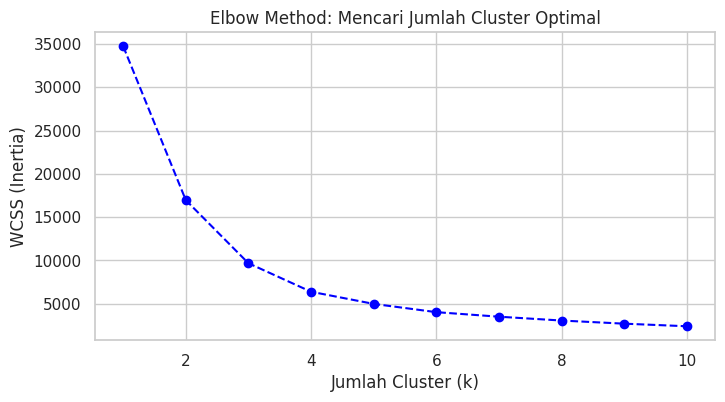

In [9]:
# Mencari Jumlah Cluster Optimal (Elbow Method)
wcss = []
k_range = range(1, 11)

for i in k_range:
    # random_state=42 agar hasil konsisten
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow (Untuk keputusan pengambilan k)
plt.figure(figsize=(8, 4))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method: Mencari Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [10]:
# Training Model Final (dengan k=3)
kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Membuat Label ke DataFrame
hour_df['cluster_id'] = cluster_labels

# Mapping Nama Cluster (Agar Human-Readable)
# Urutan cluster 0,1,2 itu acak. Kita urutkan berdasarkan rata-rata 'cnt'.
cluster_stats = hour_df.groupby('cluster_id')['cnt'].mean().sort_values().reset_index()

cluster_mapping = {
    cluster_stats.iloc[0]['cluster_id']: 'Low Demand',   # Rata-rata terendah
    cluster_stats.iloc[1]['cluster_id']: 'Medium Demand', # Rata-rata tengah
    cluster_stats.iloc[2]['cluster_id']: 'High Demand'    # Rata-rata tertinggi
}

hour_df['demand_level'] = hour_df['cluster_id'].map(cluster_mapping)

**Insight:**

#### 1. Keputusan Jumlah Cluster (Elbow Method)
- **Observasi Grafik:** Garis *Inertia* (WCSS) menunjukkan penurunan tajam dari k=1 ke k=2, dan mulai melandai secara signifikan setelah **k=3**.
- **Kesimpulan:** Titik **k=3** adalah jumlah cluster paling optimal. Penambahan cluster lebih dari 3 tidak memberikan penurunan error yang signifikan, melainkan hanya menambah kompleksitas yang tidak perlu.

#### 2. Profil Segmentasi (Karakteristik 3 Cluster)
Model berhasil mengidentifikasi 3 pola perilaku waktu yang berbeda secara otomatis:

- **Low Demand (Sepi)**
  - **Waktu:** Terjadi dominan pada jam **00:00 - 06:00** (Dini hari) dan jam **23:00**.
  - **Volume:** Rata-rata penyewaan sangat rendah (< 40 unit).
  - **Konteks:** Kota sedang tidur; aktivitas manusia minimal.

- **Medium Demand (Normal)**
  - **Waktu:** Terjadi pada jam kerja non-sibuk (**10:00 - 15:00**) dan malam hari (**19:00 - 22:00**).
  - **Volume:** Rata-rata penyewaan sedang (~140 - 250 unit).
  - **Konteks:** Aktivitas warga biasa, wisatawan, atau perjalanan santai.

- **High Demand (Sangat Sibuk)**
  - **Waktu:** Terkonsentrasi sangat ketat di jam **08:00** pagi dan **17:00 - 18:00** sore.
  - **Volume:** Rata-rata penyewaan meledak tinggi (> 450 unit).
  - **Konteks:** *Rush Hour* (Jam Pulang-Pergi Kerja). Ini adalah periode kritis pendapatan perusahaan.

### Model Evaluation

In [11]:
# Metrik Evaluasi: Silhouette Score dan DBI
sil_score = silhouette_score(X_scaled, cluster_labels)
dbi_score = davies_bouldin_score(X_scaled, cluster_labels)

# Buat DataFrame Evaluasi
scores_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index (DBI)'],
    'Score': [sil_score, dbi_score]
})

display(scores_df.style.format({'Score': '{:.4f}'}))

,Metric,Score
0,Silhouette Score,0.4876
1,Davies-Bouldin Index (DBI),0.8091


**Insight:**

#### 1. Silhouette Score: 0.4876 (Cukup Baik)
- **Definisi:** Mengukur seberapa "mirip" data dengan clusternya sendiri dibandingkan dengan cluster tetangga. (Rentang: -1 s.d 1).
- **Analisis:** Nilai **0.49** mendekati ambang batas 0.5, yang masuk dalam kategori **"Moderate to Good Structure"**.
- **Makna Real:** Ini berarti pemisahan antara jam *Low Demand* (Sepi) dan *High Demand* (Sangat Sibuk) sudah sangat jelas. Namun, wajar jika ada sedikit *overlap* atau kemiripan data di area transisi (misalnya antara jam yang "agak ramai" dengan "ramai biasa"), karena perilaku manusia memang cair dan tidak terkotak-kotak sempurna.

#### 2. Davies-Bouldin Index (DBI): 0.8091 (Solid)
- **Definisi:** Mengukur rasio penyebaran data di dalam cluster dibandingkan dengan jarak antar cluster. (Semakin kecil semakin baik, idealnya < 1.0).
- **Analisis:** Nilai **0.81** (di bawah 1.0) adalah indikator yang **Sangat Positif**.
- **Makna Real:** Ini menandakan bahwa cluster yang terbentuk memiliki karakteristik yang unik dan berbeda satu sama lain (distingtif). Cluster "Sangat Sibuk" benar-benar berisi data yang berbeda karakternya dengan cluster "Sepi".

#### **Kesimpulan Akhir:**
Secara statistik, model ini **VALID** dan **LAYAK** digunakan untuk pengambilan keputusan bisnis. Segmentasi jam menjadi 3 kategori (Low, Medium, High) bukan hanya tebakan, melainkan didukung oleh struktur data yang kuat.

### Cluster Profile & Visualization

Profil Setiap Cluster


cnt                    hr              
                mean  min  max count  mean min max count
demand_level                                            
High Demand    479.0  274  977  3584  14.0   7  22  3584
Low Demand      60.0    1  304  7003   5.0   0  12  7003
Medium Demand  170.0    2  360  6792  17.0  10  23  6792

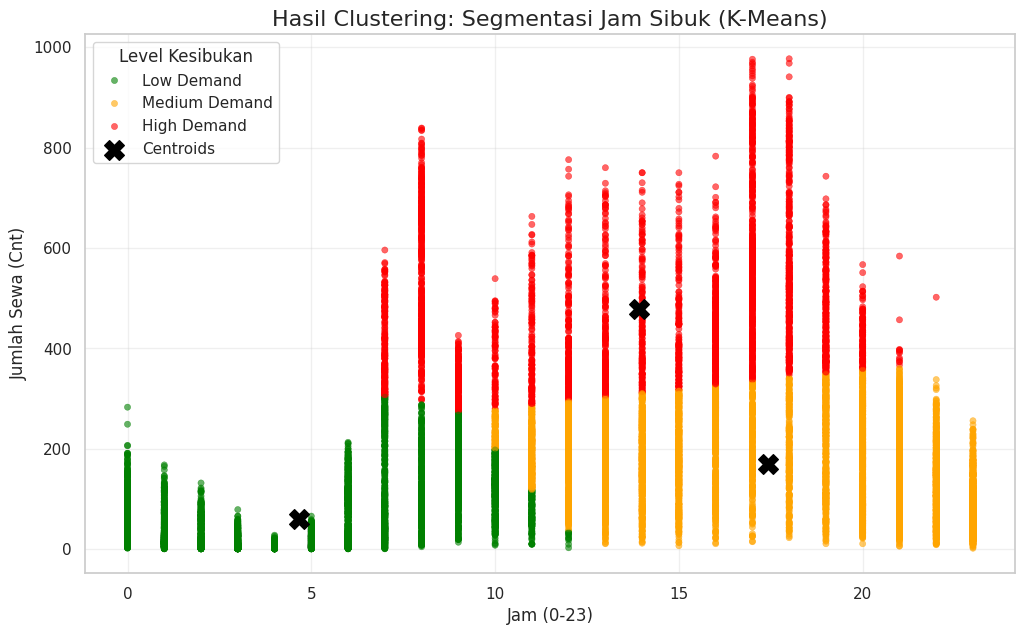

In [12]:
# Tabel Statistik per Cluster
print("Profil Setiap Cluster")
stats_df = hour_df.groupby('demand_level')[['cnt', 'hr']].agg(['mean', 'min', 'max', 'count']).round(0)
display(stats_df)

# Visualisasi Scatter Plot
plt.figure(figsize=(12, 7))

# Plotting
sns.scatterplot(
    data=hour_df, x='hr', y='cnt', hue='demand_level',
    palette={'Low Demand': 'green', 'Medium Demand': 'orange', 'High Demand': 'red'},
    alpha=0.6, s=20, edgecolor=None
)

# Menandai Centroids (Pusat Cluster) - Perlu inverse transform agar kembali ke skala asli
centroids = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title('Hasil Clustering: Segmentasi Jam Sibuk (K-Means)', fontsize=16)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Jumlah Sewa (Cnt)', fontsize=12)
plt.legend(title='Level Kesibukan', loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

**Insight:**

#### 1. High Demand (Zona Merah)
- **Statistik:**
  - **Volume:** Ini adalah cluster paling sibuk dengan rata-rata sewa **479 unit/jam**.
  - **Puncak:** Nilai maksimum mencapai **977 unit** (hampir 1000 sepeda keluar dalam 1 jam!).
  - **Waktu:** Terjadi di rentang jam 07:00 hingga 22:00, namun secara visual terkonsentrasi di dua waktu spesifik: Pagi (berangkat kerja) dan Sore (pulang kerja).
- **Interpretasi Visual:** Pada *scatter plot*, cluster ini akan terlihat seperti **dua menara tinggi** yang menjulang di sisi kiri (pagi) dan kanan (sore).
- **Rekomendasi Bisnis:** **Critical Period.** Ketersediaan stok sepeda dan *docking* kosong harus diprioritaskan 100%. Kegagalan di jam ini berisiko tinggi terhadap kepuasan pelanggan utama (pekerja).

#### 2. Medium Demand (Zona Oranye)
- **Statistik:**
  - **Volume:** Aktivitas moderat dengan rata-rata **170 unit/jam**.
  - **Range:** Bergerak stabil antara minimum 2 unit hingga maksimum 360 unit.
  - **Waktu:** Dimulai dari jam 10:00 pagi hingga 23:00 malam.
- **Interpretasi Visual:** Cluster ini mengisi **celah di tengah hari** (antara jam sibuk pagi dan sore) serta aktivitas malam hari sebelum tidur. Titik-titiknya menyebar rata di tengah grafik.
- **Rekomendasi Bisnis:** Periode ini ideal untuk **Maintenance Ringan**. Mekanik bisa memeriksa kondisi rem/ban di stasiun tanpa terlalu mengganggu aliran pengguna, karena jumlah sepeda yang tersedia masih cukup banyak.

#### 3. Low Demand (Zona Hijau)
- **Statistik:**
  - **Volume:** Sangat sepi, rata-rata hanya **60 unit/jam**.
  - **Dominasi:** Ini adalah cluster dengan jumlah data terbanyak (Count: 7.003 jam), artinya sebagian besar waktu operasional sebenarnya berada di kondisi sepi.
  - **Waktu:** Dominan di jam 00:00 hingga 12:00 siang (khususnya dini hari).
- **Interpretasi Visual:** Cluster ini membentuk **lapisan dasar** yang datar di bagian bawah grafik, terutama tebal di area jam 00:00 - 06:00.
- **Rekomendasi Bisnis:** **Efisiensi Biaya.** Manajemen bisa mengurangi jumlah staf lapangan (*manpower*) atau mematikan sebagian lampu stasiun non-utama untuk menghemat listrik. Ini juga waktu terbaik untuk *rebalancing* (pemindahan) sepeda antar stasiun secara besar-besaran menggunakan truk.

### Export Model

In [13]:
# Simpan Model K-Means
joblib.dump(kmeans_final, 'kmeans_bike_cluster.joblib')

# Simpan Scaler
joblib.dump(scaler, 'scaler_bike_cluster.joblib')

['scaler_bike_cluster.joblib']

## Conclusion

**Conclusion**

### A. Jawaban Analisis Deskriptif (Exploratory Data Analysis)

**1. Pola Waktu: Bagaimana perbedaan karakteristik antara Hari Kerja vs Hari Libur?**
* **Hari Kerja (*Working Day*):** Memiliki pola "Bimodal" (Dua Puncak) yang sangat jelas pada pukul **08:00** dan **17:00-18:00**. Ini mengindikasikan penggunaan dominan untuk aktivitas komuter (pergi-pulang kerja/sekolah).
* **Hari Libur (*Holiday/Weekend*):** Memiliki pola "Unimodal" (Satu Puncak) yang landai, dimulai dari pukul **10:00 hingga 16:00**. Ini mengindikasikan penggunaan untuk rekreasi atau olahraga santai.

**2. Pertumbuhan Bisnis: Bagaimana tren performa dari tahun 2011 ke 2012?**
* Bisnis mengalami **pertumbuhan yang signifikan**. Total penyewaan pada tahun 2012 jauh lebih tinggi dibandingkan tahun 2011 di hampir seluruh bulan. Hal ini menunjukkan bahwa strategi ekspansi pasar berhasil dan popularitas *bike sharing* semakin meningkat.

**3. Faktor Musim: Musim apa yang menjadi "Masa Panen" (*Peak Season*)?**
* **Musim Gugur (*Fall*)** adalah masa puncak penyewaan tertinggi, diikuti oleh Musim Panas (*Summer*).
* Sebaliknya, **Musim Semi (*Spring*)** memiliki tingkat penyewaan terendah. Strategi pemasaran harus lebih agresif di musim semi untuk mendongkrak angka penggunaan.

**4. Sensitivitas Cuaca: Seberapa besar dampak cuaca buruk?**
* Kondisi cuaca memiliki dampak **sangat signifikan**. Penyewaan tertinggi terjadi saat cuaca cerah (*Clear*).
* Saat cuaca memburuk menjadi Hujan Ringan/Salju (*Light Snow/Rain*), terjadi penurunan drastis pada jumlah penyewa. Ini adalah risiko operasional yang tidak bisa dihindari namun bisa diprediksi.

**5. Segmentasi Pelanggan: Bagaimana perilaku Pengguna Terdaftar vs Casual?**
* **Pengguna Terdaftar (*Registered*):** Pola penggunaan sangat stabil dan mengikuti jam kerja (Senin-Jumat). Mereka adalah basis pelanggan setia yang menggunakan sepeda sebagai moda transportasi utama.
* **Pengguna Kasual (*Casual*):** Pola penggunaan lebih fluktuatif, meningkat tajam di akhir pekan dan sangat sensitif terhadap cuaca. Mereka adalah target pasar potensial untuk sektor pariwisata.

---

### B. Jawaban Analisis Lanjutan (Advanced Modeling)

**6. Segmentasi Jam Sibuk: Bagaimana hasil pengelompokan otomatis menggunakan K-Means?**
Algoritma K-Means berhasil mengelompokkan jam operasional menjadi 3 kategori strategi yang berbeda:
* **High Demand (Jam Sibuk):** Teridentifikasi pada jam **08:00** dan **17:00-18:00**.
    * *Action:* Stok sepeda harus penuh 100%. Prioritas utama staf lapangan.
* **Medium Demand (Jam Normal):** Teridentifikasi pada siang hari (**10:00-16:00**) dan malam hari (**19:00-22:00**).
    * *Action:* Operasional normal. Waktu yang tepat untuk *maintenance* ringan di stasiun.
* **Low Demand (Jam Sepi):** Teridentifikasi dominan pada dini hari (**00:00-06:00**).
    * *Action:* Efisiensi biaya (pengurangan shift malam) dan waktu terbaik untuk distribusi ulang (*rebalancing*) sepeda antar stasiun menggunakan truk.